<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/math_stat/homeworks/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_11_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
from sklearn.utils import shuffle
from collections import namedtuple

%matplotlib inline

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
n = 10000
array1 = np.array([sts.bernoulli(0.5).rvs(n)])
array2 = np.array([sts.bernoulli(0.5).rvs(n)])
first_condition = [(1, 0), (0, 1)]

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1)), axis=1)
filtered_array = list(filter(lambda x: (x[0], x[1]) in first_condition, concat_array))
print(len(filtered_array) / len(concat_array))

0.4955


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [3]:
n = 10000
array1 = np.array([sts.bernoulli(0.5).rvs(n)])
array2 = np.array([sts.bernoulli(0.5).rvs(n)])
array3 = np.array([sts.bernoulli(0.5).rvs(n)])

first_condition = [(0, 0, 0)]
second_condition = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
third_condition = [(1, 1, 0)]

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1),
                               array3.reshape(n, 1)), axis=1)

filtered_array1 = list(filter(lambda x: (x[0], x[1], x[2]) in first_condition, concat_array))
filtered_array2 = list(filter(lambda x: (x[0], x[1], x[2]) in second_condition, concat_array))
filtered_array3 = list(filter(lambda x: (x[0], x[1], x[2]) in third_condition, concat_array))

print('A:', len(filtered_array1) / len(concat_array))
print('B:', len(filtered_array2) / len(concat_array))
print('C:', len(filtered_array3) / len(concat_array))

A: 0.1225
B: 0.3744
C: 0.1238


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [4]:
n = 10000
E = 1
L = 2
array1 = np.random.randint(0, 3, n)
array2 = np.random.randint(0, 3, n)
array3 = np.random.randint(0, 3, n)

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1),
                               array3.reshape(n, 1)), axis=1)

print('E: ', len(np.where(np.sum(concat_array == E, axis=1) >= 2)[0]) / n)
print('L: ', len(np.where(np.sum(concat_array == L, axis=1) >= 2)[0]) / n)

E:  0.2608
L:  0.2586


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [5]:
n = 1000
array1 = np.random.randint(1, 7, n)
array2 = np.random.randint(1, 7, n)

first_condition = [(6, 6)]
second_condition = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
third_condition = [(1, 1, 0)]

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1)), axis=1)



filtered_array1 = list(filter(lambda x: (x[0], x[1]) in first_condition, concat_array))
filtered_array2 = np.where(np.sum(concat_array, axis=1) >= 11)
filtered_array3 = list(filter(lambda x: (x[0] != 6) & (x[1] != 6) , concat_array))

print('A:', len(filtered_array1) / len(concat_array))
print('B:', len(filtered_array2[0]) / len(concat_array))
print('C:', len(filtered_array3) / len(concat_array))

A: 0.032
B: 0.099
C: 0.674


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [6]:
n = 1000
array1 = np.random.randint(1, 7, n)
array2 = np.random.randint(1, 7, n)

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1)), axis=1)


filtered_array1 = list(filter(lambda x: (x[0] == 6) | (x[1] == 6) , concat_array))

print('D:', len(filtered_array1) / len(concat_array))

D: 0.29


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [7]:
n = 1000
array1 = np.random.randint(0, 10, n)
array2 = np.random.randint(0, 10, n)
array3 = np.random.randint(0, 10, n)

first_condition = [(6, 6)]
second_condition = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
third_condition = [(1, 1, 0)]

concat_array = np.concatenate((array1.reshape(n, 1), 
                               array2.reshape(n, 1),
                               array3.reshape(n, 1)), axis=1)

filtered_array1 = list(filter(lambda x: not (x[0] == x[1] and x[1] == x[2]) , concat_array))
filtered_array2 = list(filter(lambda x: (x[0] == x[1] and x[1] == x[2]) , concat_array))
filtered_array3 = list(filter(lambda x: (x[0] == x[1] or x[1] == x[2] or x[0] == x[2]) , concat_array))
filtered_array4 = list(filter(lambda x: (x[0] != x[1] or x[1] != x[2] or x[0] != x[2]) , concat_array))


print('A:', len(filtered_array1) / len(concat_array))
print('B:', len(filtered_array2) / len(concat_array))
print('C:', len(filtered_array3) / len(concat_array))
print('D:', len(filtered_array4) / len(concat_array))

A: 0.993
B: 0.007
C: 0.274
D: 0.993


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

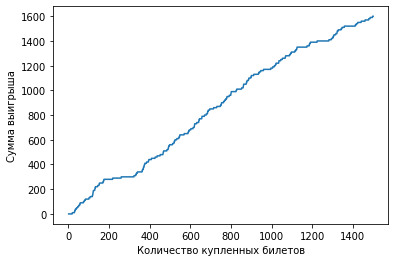

In [8]:
n = 1500
array = np.array([shuffle([1,0,0,0,0,0,0,0,0,0]) for _ in range(n)])
costs = np.arange(1, n+1)

plt.plot(costs, np.cumsum(array[:, 0] * 10))
plt.xlabel('Количество купленных билетов')
plt.ylabel('Сумма выигрыша')
plt.show()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

Вероятность X <= 4: 0.162
Вероятность X > 4: 0.838


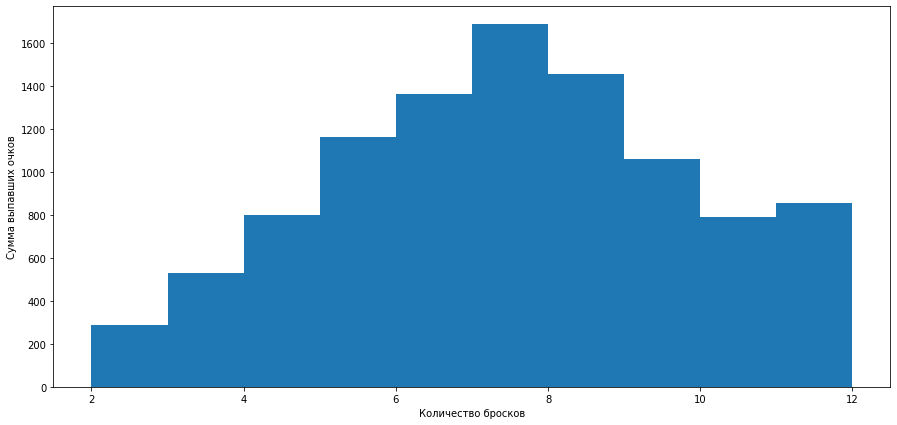

In [9]:
n = 10000
array1 = np.random.randint(1, 7, n)
array2 = np.random.randint(1, 7, n)

sum_array = array1 + array2

print('Вероятность X <= 4:', len(np.where(sum_array <= 4)[0]) / n)
print('Вероятность X > 4:', len(np.where(sum_array > 4)[0]) / n)
plt.figure(figsize=(15,7))
plt.hist(sum_array)
plt.xlabel('Количество бросков')
plt.ylabel('Сумма выпавших очков')
plt.show()

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [10]:
Card = namedtuple('Card', ['value', 'suit'])
suits = ['hearts', 'diamonds', 'spades', 'clubs']
cards = [Card(value, suit) for value in range(6, 15) for suit in suits]
n = 1000
first_card = '6'
second_card  = '7'

cards = np.array([shuffle([Card(value, suit) for value in range(6, 15) for suit in suits]) for _ in range(n)])


print('Вероятность, что первая карта 6, а вторая 7:', 
      len(list(filter(lambda x: (x[0][0] == first_card and x[1][0] == second_card) , cards))) / n)


print('Вероятность, что две первые карты бубновые:', 
      len(list(filter(lambda x: (x[0][1] == 'diamonds' and x[1][1] == 'diamonds') , cards))) / n)

Вероятность, что первая карта 6, а вторая 7: 0.013
Вероятность, что две первые карты бубновые: 0.05


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [11]:
WHITE = 0
BLACK = 1
urn = [0, 0, 1, 1, 1]
urn_second_after_black = [0, 0, 0, 1, 1]
urn_second_after_white = [0, 1, 1, 1]
n = 1000
choices = []

for x in range(n):
  first_choice = np.random.choice(urn)
  if first_choice:
    second_choice = np.random.choice(urn_second_after_black)
  else:
    second_choice = np.random.choice(urn_second_after_white)
  choices.append([first_choice, second_choice])

filtered_array1 = list(filter(lambda x: (x[0], x[1]) == (WHITE, WHITE), choices))
filtered_array2 = list(filter(lambda x: (x[0], x[1]) == (BLACK, BLACK), choices))

print('Извлечены два белых шара', len(filtered_array1) / n)
print('Извлечены два черных шара', len(filtered_array2) / n)

Извлечены два белых шара 0.097
Извлечены два черных шара 0.245
